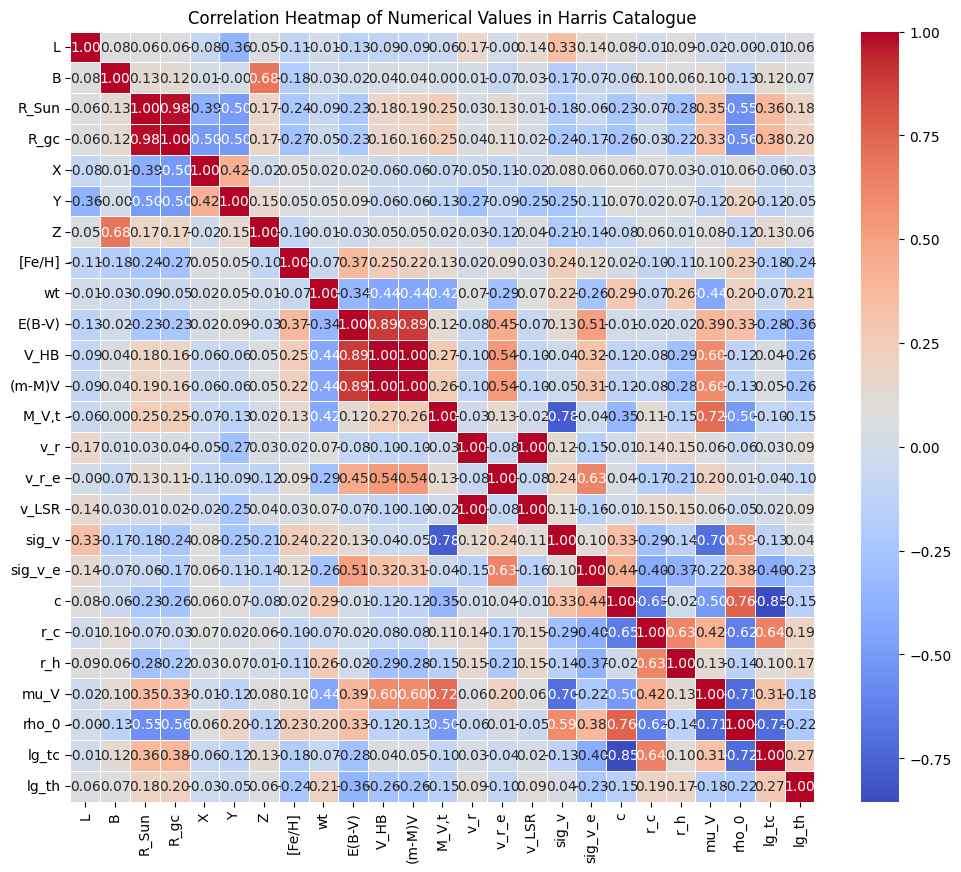

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Harris data files
harris_part1 = pd.read_csv('data/Option 1/HarrisPartI.csv')
harris_part2 = pd.read_csv('data/Option 1/HarrisPartII.csv')
harris_part3 = pd.read_csv('data/Option 1/HarrisPartIII.csv')

def reformat_id(csv):
    """ Harris Part II csv is incorrectly formatted, causing incorrect join on "ID", and non_numeric representations.
    Reformat by removing trailing whitespace.

    Args:
        csv (Dataframe): _description_
    """
    csv['M_V,t'] = pd.to_numeric(csv['M_V,t'], errors='coerce')
    csv['[Fe/H]'] = pd.to_numeric(csv['[Fe/H]'], errors='coerce')
    csv['ID'] = csv['ID'].apply(lambda s: s.rstrip())

def generate_correlation_heatmap():

    # Merge all the data files on 'ID' (Cluster identification)
    merged_data = harris_part1.merge(harris_part2, on="ID").merge(harris_part3, on="ID")

    # Select only numerical columns
    numerical_data = merged_data.select_dtypes(include=['float64', 'int64'])
    # print(numerical_data.columns, numerical_data.size, len(numerical_data))

    # Generate a correlation matrix
    corr_matrix = numerical_data.corr()

    # Plot the heatmap using seaborn
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap of Numerical Values in Harris Catalogue')
    plt.show()

reformat_id(harris_part2)
generate_correlation_heatmap()

## Correlation for Krause + Vandenberg

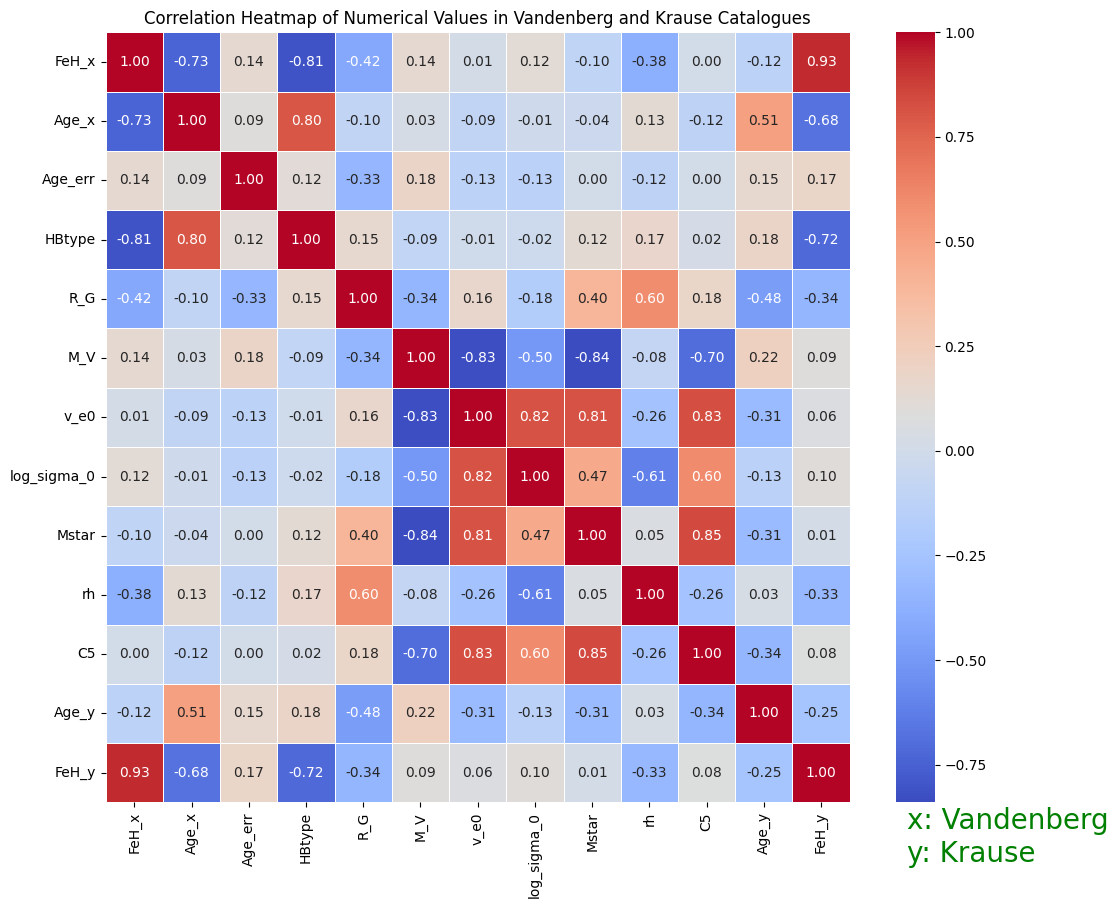

,#NGC,Name,FeH_x,Age_x,Age_err,Method,Figs,Range,HBtype,R_G,...,v_e0,log_sigma_0,Class,Object,AltName,Mstar,rh,C5,Age_y,FeH_y
0,104,47Tuc,-0.76,11.75,0.25,V,14,11.50–11.75,-0.99,7.4,...,54.8,5.061,GC,NGC104,47Tuc,6.46,7.10,0.92,12.80,-0.76
1,288,XXXX,-1.32,11.50,0.38,H,24,NaN,0.98,12.0,...,10.9,2.953,GC,NGC288,Melotte3,0.46,9.80,0.05,12.20,-1.32
2,362,XXXX,-1.30,10.75,0.25,V,13,10.75–11.00,-0.87,9.4,...,44.4,4.938,GC,NGC362,Dunlop62,2.50,3.50,0.72,10.00,-1.26
3,1261,XXXX,-1.27,10.75,0.25,V,13,10.75–11.25,-0.71,18.1,...,23.6,3.913,GC,NGC1261,Caldwell87,3.41,5.50,0.62,10.24,-1.08
4,1851,XXXX,-1.18,11.00,0.25,V,13,10.75–11.25,-0.32,16.6,...,47.6,5.136,GC,NGC1851,Dunlop508,5.51,3.05,1.81,7.64,-1.13


In [34]:
vandenberg = pd.read_csv('data/Option 1/vandenBerg_table2.csv')
krause = pd.read_csv('data/Option 1/Krause21.csv')

def obj2NGC(s):
    """ Convert Object string to pure NGC. Return None if not NGC.

    Args:
        s (str): Object string from Krause
    """
    if s[0:3] == "NGC":
        return s[3:]
    else:
        return None

krause['#NGC'] = krause['Object'].apply(obj2NGC)

merged = vandenberg.merge(krause, on="#NGC")

# Select only numerical columns
numerical_data = merged.select_dtypes(include=['float64', 'int64'])
# print(numerical_data.columns, numerical_data.size, len(numerical_data))

# Generate a correlation matrix
corr_matrix = numerical_data.corr()

# Plot the heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Values in Vandenberg and Krause Catalogues')
plt.text(14, 14, s="x: Vandenberg\ny: Krause", color="green", size=20)
plt.show()

merged.head()